<a href="https://colab.research.google.com/github/Charles-CB/Actividades_Aprendizaje-/blob/main/Avance1/Copia_Avance1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estructura de los datos**
Se incluye una descripción general de la forma y los tipos de datos. Se obtienen estadísticas descriptivas para todas las variables del conjunto. En variables categóricas se determina la frecuencia de las clases. Se identifican valores faltantes.

## Importación de los datos

In [241]:
import pandas as pd
from google.colab import drive
import numpy as np


db_Bipolar = '/content/Base de datos Bipolares MTY TEC AI.xlsx'


df = pd.read_excel(db_Bipolar)

# Hacemos una copia del dataframe
df_copia = df.copy()


In [242]:
# Mostramos las primeras filas del DataFrame para verificar que se haya cargado correctamente
df_copia.head()

,ID,Family ID,Parentesco/Proband Relation,Edad,Género/Gender,Estado Civil/Marital Status,Escolaridad/School Years,Religión,Empleo/Employment,Psychiatric_Diagnosis_DIGS,...,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders,Unnamed: 19,Unnamed: 20
0,10001,-100,3,72,2,1,6,1,1,No Pathology,...,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,NaN,1:si 2: no
1,10002,-100,2,77,1,1,4,1,1,Depresion Mayor,...,1,2,2,2,2,2,2,2,NaN,NaN
2,10003,-100,1,36,1,2,6,3,1,BPI,...,2,2,1,2,2,2,2,2,NaN,NaN
3,10101,-101,3,68,2,1,3,1,2,Depresion Mayor,...,1,2,2,2,2,2,2,2,NaN,NaN
4,10102,-101,2,56,1,1,4,1,Missing,No Pathology,...,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,NaN,NaN


## Limpieza de los datos

In [243]:
# Visualizamos el tamaño del DataFrame
print("Número de filas y columnas:")
print(df_copia.shape)

Número de filas y columnas:
(427, 21)


In [244]:
# Hacemos un info para entender mejor el df y ver los tipos de datos para cada variable
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             427 non-null    int64  
 1   Family ID                      427 non-null    int64  
 2   Parentesco/Proband Relation    427 non-null    object 
 3   Edad                           427 non-null    object 
 4   Género/Gender                  427 non-null    int64  
 5   Estado Civil/Marital Status    427 non-null    object 
 6   Escolaridad/School Years       427 non-null    object 
 7   Religión                       427 non-null    object 
 8   Empleo/Employment              423 non-null    object 
 9   Psychiatric_Diagnosis_DIGS     425 non-null    object 
 10  Psychosis_DIGS                 427 non-null    object 
 11  D+AH1epression_DIGS            427 non-null    object 
 12  Anxiety_DIGS                   427 non-null    obj

In [245]:
# Contamos y visualizamos todas las columnas que tiene el df
for i, columna in enumerate(df_copia.columns, start=1):
    print("Columna", i, columna)

Columna 1 ID
Columna 2 Family ID
Columna 3 Parentesco/Proband Relation
Columna 4 Edad
Columna 5 Género/Gender
Columna 6 Estado Civil/Marital Status
Columna 7 Escolaridad/School Years
Columna 8 Religión
Columna 9 Empleo/Employment
Columna 10 Psychiatric_Diagnosis_DIGS
Columna 11 Psychosis_DIGS
Columna 12 D+AH1epression_DIGS
Columna 13 Anxiety_DIGS
Columna 14 Bipolar_DIGS
Columna 15 Eating_Disorders_DIGS
Columna 16 Alcohol_Abuse/Dependence_DIGS
Columna 17 Drugs_Abuse/Dependence_DIGS
Columna 18 Behaviour_Disorders
Columna 19 Personality_Disorders
Columna 20 Unnamed: 19
Columna 21 Unnamed: 20


In [246]:
# Eliminamos las columnas que no vamos a necesitar
columnas_a_eliminar = ["ID", "Unnamed: 19", "Unnamed: 20"]
df_copia.drop(columnas_a_eliminar, axis=1, inplace=True)

In [247]:
# Formateamos los nombres de las columnas
nuevos_nombres = {
    "Family ID": "Family_ID",
    "Parentesco/Proband Relation": "Proband_Relation",
    "Género/Gender": "Gender",
    "Estado Civil/Marital Status": "Marital_Status",
    "Escolaridad/School Years": "School_Years",
    "Empleo/Employment": "Employment",
    "Edad":"Age",
    "Religión": "Religion",

}

df_copia.rename(columns=nuevos_nombres, inplace=True)

In [248]:
# Vemos todas las columnas que tiene el df despues de eliminar las no necesarias y formatear las existentes
for i, columna in enumerate(df_copia.columns, start=1):
    print("Columna", i, columna)

Columna 1 Family_ID
Columna 2 Proband_Relation
Columna 3 Age
Columna 4 Gender
Columna 5 Marital_Status
Columna 6 School_Years
Columna 7 Religion
Columna 8 Employment
Columna 9 Psychiatric_Diagnosis_DIGS
Columna 10 Psychosis_DIGS
Columna 11 D+AH1epression_DIGS
Columna 12 Anxiety_DIGS
Columna 13 Bipolar_DIGS
Columna 14 Eating_Disorders_DIGS
Columna 15 Alcohol_Abuse/Dependence_DIGS
Columna 16 Drugs_Abuse/Dependence_DIGS
Columna 17 Behaviour_Disorders
Columna 18 Personality_Disorders


In [249]:
# Hacemos un conteo de los datos que sean nulos por columna
print(df_copia.isnull().sum())

Family_ID                        0
Proband_Relation                 0
Age                              0
Gender                           0
Marital_Status                   0
School_Years                     0
Religion                         0
Employment                       4
Psychiatric_Diagnosis_DIGS       2
Psychosis_DIGS                   0
D+AH1epression_DIGS              0
Anxiety_DIGS                     0
Bipolar_DIGS                     0
Eating_Disorders_DIGS            0
Alcohol_Abuse/Dependence_DIGS    0
Drugs_Abuse/Dependence_DIGS      0
Behaviour_Disorders              0
Personality_Disorders            0
dtype: int64


In [250]:
# Eliminamos los datos que sean nulos para cada columna
df_copia.dropna(inplace=True)

In [251]:
# Hacemos un conteo de los datos que sean nulos nuevamente
print(df_copia.isnull().sum())

Family_ID                        0
Proband_Relation                 0
Age                              0
Gender                           0
Marital_Status                   0
School_Years                     0
Religion                         0
Employment                       0
Psychiatric_Diagnosis_DIGS       0
Psychosis_DIGS                   0
D+AH1epression_DIGS              0
Anxiety_DIGS                     0
Bipolar_DIGS                     0
Eating_Disorders_DIGS            0
Alcohol_Abuse/Dependence_DIGS    0
Drugs_Abuse/Dependence_DIGS      0
Behaviour_Disorders              0
Personality_Disorders            0
dtype: int64


In [252]:
# Creamos una función para convertir los strings de cada columna a numericos y remplazarlos por la moda
# Dado que son variables categoricas

def procesar_columna(df_proce, columna):

    df_proce[columna] = pd.to_numeric(df_proce[columna], errors='coerce')

    moda_columna = df_proce[columna].mode()[0]

    df_proce[columna] = df_proce[columna].fillna(moda_columna)

    df_proce[columna] = df_proce[columna].astype(int)

    return df_proce[columna]

In [253]:
# Con base en el info que se hizo anteriormente convertimos solo las columnas que deberían de ser tipo entero
# pero al tener algún string en las filas, lo detecta como object

# Lista de nombres de las columnas categoricas que se van a sustituir los valores string por numericos
col_cat = ['Proband_Relation', 'Age', 'Marital_Status', 'School_Years', 'Religion', 'Employment']

# Aplicamos la función procesar_columna a cada columna
for columna in col_cat:
    df_copia[columna] = procesar_columna(df_copia, columna)

In [254]:
# Creamos una funcion para sustituir las variables categoricas que esten fuera de rango por la moda

def procesar_columna_range(df_pro, columna, rango_min, rango_max):
    # Encuentra la moda de la columna
    moda_columna = df_pro[columna].mode()[0]

    # Reemplaza los valores que no están en el rango por la moda
    df_pro[columna] = df_pro[columna].apply(lambda x: x if rango_min <= x <= rango_max else moda_columna)

    return df_pro[columna]

In [255]:
# Formateamos las columnas para que no esten fuera de rango

 # Definir los rangos permitidos para cada columna
rangos = {
    'Proband_Relation': (1,15),
    'Gender': (1,2),
    'Marital_Status': (1,6),
    'School_Years': (1,6),
    'Religion': (1,3),
    'Employment': (1,2),
}

# Aplicamos la función procesar_columna_range a cada columna con su respectivo rango
for columna, (rango_min, rango_max) in rangos.items():
    df_copia[columna] = procesar_columna_range(df_copia, columna, rango_min, rango_max)

In [256]:
# Hacemos un head para visualizar la tabla
# Como se observa hay variables donde las categorias estan como números, hay que mapearlas
df_copia.head()

,Family_ID,Proband_Relation,Age,Gender,Marital_Status,School_Years,Religion,Employment,Psychiatric_Diagnosis_DIGS,Psychosis_DIGS,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders
0,-100,3,72,2,1,6,1,1,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
1,-100,2,77,1,1,4,1,1,Depresion Mayor,2,1,2,2,2,2,2,2,2
2,-100,1,36,1,2,6,3,1,BPI,2,2,2,1,2,2,2,2,2
3,-101,3,68,2,1,3,1,2,Depresion Mayor,2,1,2,2,2,2,2,2,2
4,-101,2,56,1,1,4,1,1,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology


In [257]:
# Mapeamos las columnas del df con sus respectivas categorias
mapeo = {
    'Proband_Relation': {1: 'Proband', 2: 'Father', 3: 'Mother', 4: 'Brother', 5: 'Sister', 6: 'Son', 7: 'Daughter', 8:'Uncle', 9:'Aunt',
                   10:'Grandfather',11:'Grandmother', 12:'Nephew',13:'Niece',14:'Cousin_Male',15:"Cousin_Female" },
    'Gender': {1: 'Male', 2: 'Female'},
    'Marital_Status': {1: 'Married', 2: 'Single', 3:'Divorced',4:'Widowed',5:'Living_together',6:'Separated'},
    'School_Years': {1:'Elementary_school',2:'Middle_school',3:'High_school',4:'College',5:'Postgraduate',6:'Technical_studies'},
    'Religion': {1:'Catholic',2:'Christian_(other)',3:'No_religion'},
    'Employment': {1:'Yes',2:'No'},
    'Psychosis_DIGS': {1:'One', 2:'Two'},
    'D+AH1epression_DIGS': {1:'One', 2:'Two'},
    'Anxiety_DIGS': {1:'One', 2:'Two'},
    'Bipolar_DIGS': {1:'One', 2:'Two'},
    'Eating_Disorders_DIGS': {1:'One', 2:'Two'},
    'Alcohol_Abuse/Dependence_DIGS': {1:'One', 2:'Two'},
    'Drugs_Abuse/Dependence_DIGS': {1:'One', 2:'Two'},
    'Behaviour_Disorders': {1:'One', 2:'Two'},
    'Personality_Disorders': {1:'One', 2:'Two'},
}

df_copia.replace(mapeo, inplace=True)


In [258]:
# Hacemos un info para ver el df despues de la limpieza y el mapeo
# Ahora solo debemos tener dos variables tipo numericas Family ID y Age todas las demas deben de ser categoricas
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 426
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Family_ID                      421 non-null    int64 
 1   Proband_Relation               421 non-null    object
 2   Age                            421 non-null    int64 
 3   Gender                         421 non-null    object
 4   Marital_Status                 421 non-null    object
 5   School_Years                   421 non-null    object
 6   Religion                       421 non-null    object
 7   Employment                     421 non-null    object
 8   Psychiatric_Diagnosis_DIGS     421 non-null    object
 9   Psychosis_DIGS                 421 non-null    object
 10  D+AH1epression_DIGS            421 non-null    object
 11  Anxiety_DIGS                   421 non-null    object
 12  Bipolar_DIGS                   421 non-null    object
 13  Eating_Dis

In [259]:
# Hacemos un head despues del mapeo para visualizar los cambios
df_copia.head()


,Family_ID,Proband_Relation,Age,Gender,Marital_Status,School_Years,Religion,Employment,Psychiatric_Diagnosis_DIGS,Psychosis_DIGS,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders
0,-100,Mother,72,Female,Married,Technical_studies,Catholic,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
1,-100,Father,77,Male,Married,College,Catholic,Yes,Depresion Mayor,Two,One,Two,Two,Two,Two,Two,Two,Two
2,-100,Proband,36,Male,Single,Technical_studies,No_religion,Yes,BPI,Two,Two,Two,One,Two,Two,Two,Two,Two
3,-101,Mother,68,Female,Married,High_school,Catholic,No,Depresion Mayor,Two,One,Two,Two,Two,Two,Two,Two,Two
4,-101,Father,56,Male,Married,College,Catholic,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology


## Estadistica de los datos

In [260]:
# Descripcion general de los datos
print("Descripción general de la forma y los tipos de datos:")
print(df_copia.info())

Descripción general de la forma y los tipos de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 426
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Family_ID                      421 non-null    int64 
 1   Proband_Relation               421 non-null    object
 2   Age                            421 non-null    int64 
 3   Gender                         421 non-null    object
 4   Marital_Status                 421 non-null    object
 5   School_Years                   421 non-null    object
 6   Religion                       421 non-null    object
 7   Employment                     421 non-null    object
 8   Psychiatric_Diagnosis_DIGS     421 non-null    object
 9   Psychosis_DIGS                 421 non-null    object
 10  D+AH1epression_DIGS            421 non-null    object
 11  Anxiety_DIGS                   421 non-null    object
 12  Bipolar_DIGS   

In [261]:
# Aplicamos estadistica descriptiva solo a las variables numéricas
df_copia.describe(include=[np.number])


,Family_ID,Age
count,421.000000,421.000000
mean,-143.826603,40.795724
std,30.928194,15.603451
min,-187.000000,15.000000
25%,-172.000000,28.000000
50%,-142.000000,39.000000
75%,-121.000000,52.000000
max,185.000000,87.000000


### Frecuencia de las clases en variables categóricas

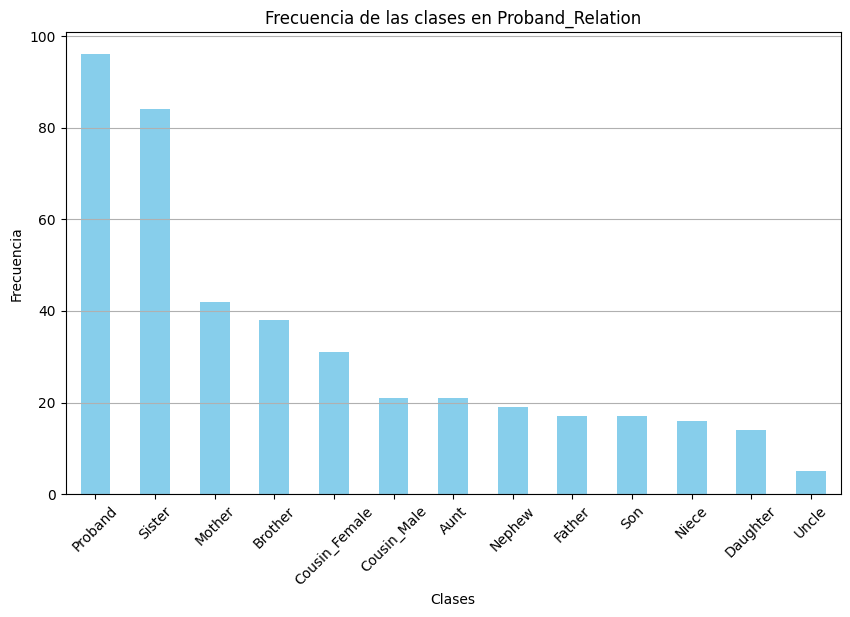

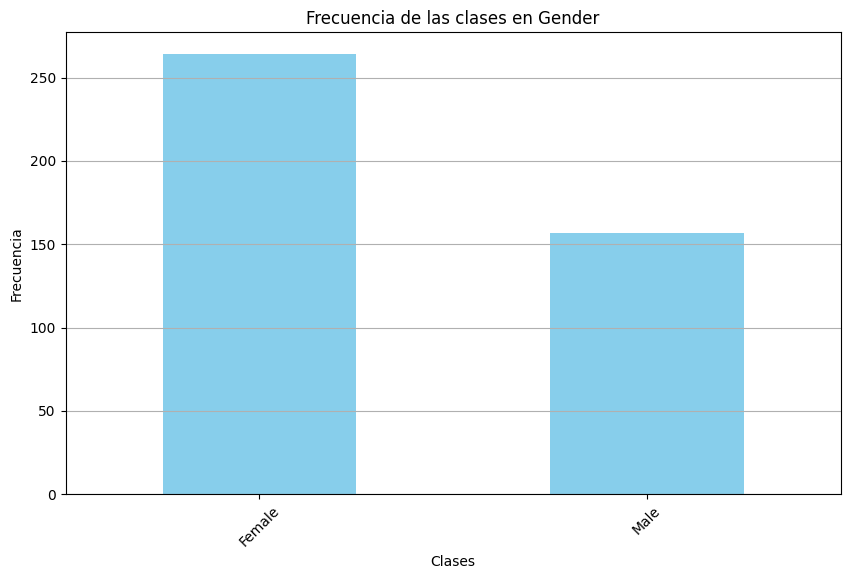

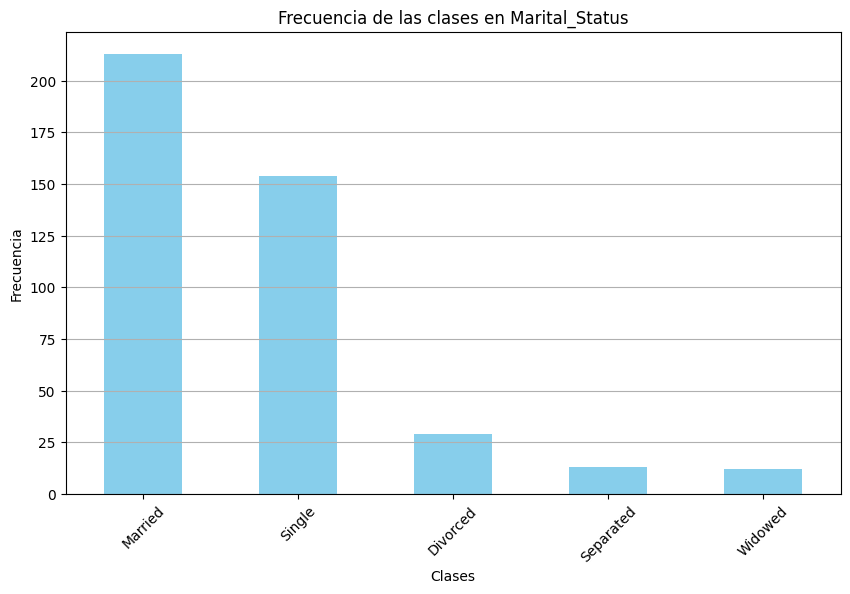

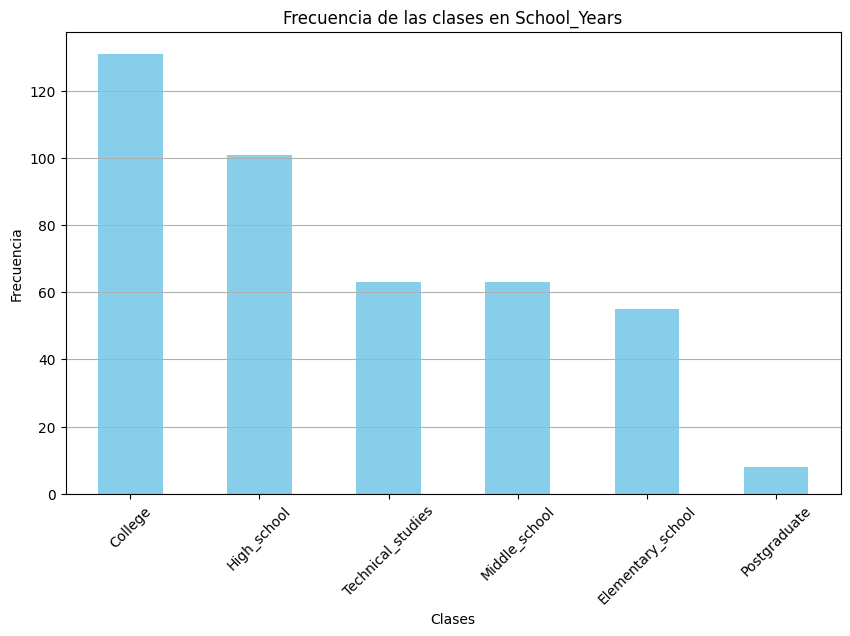

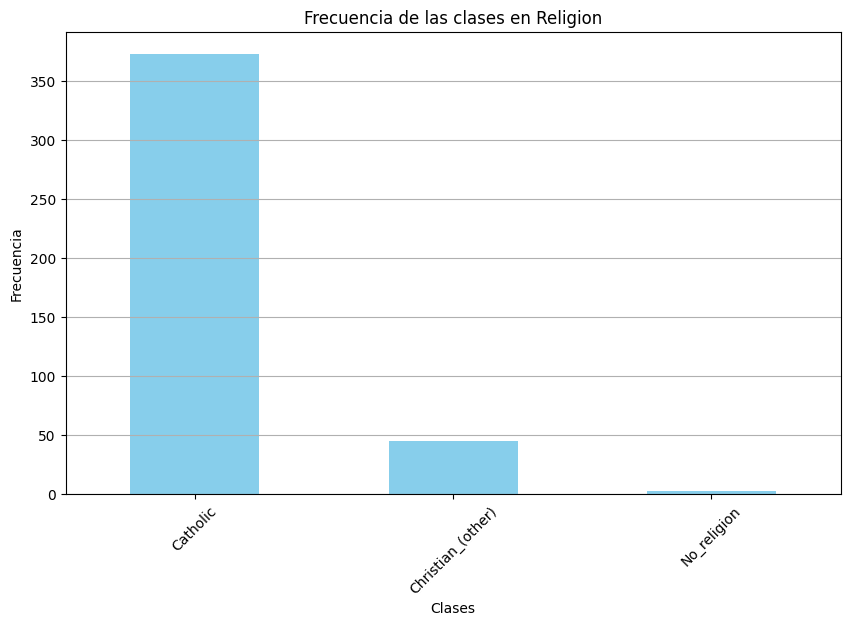

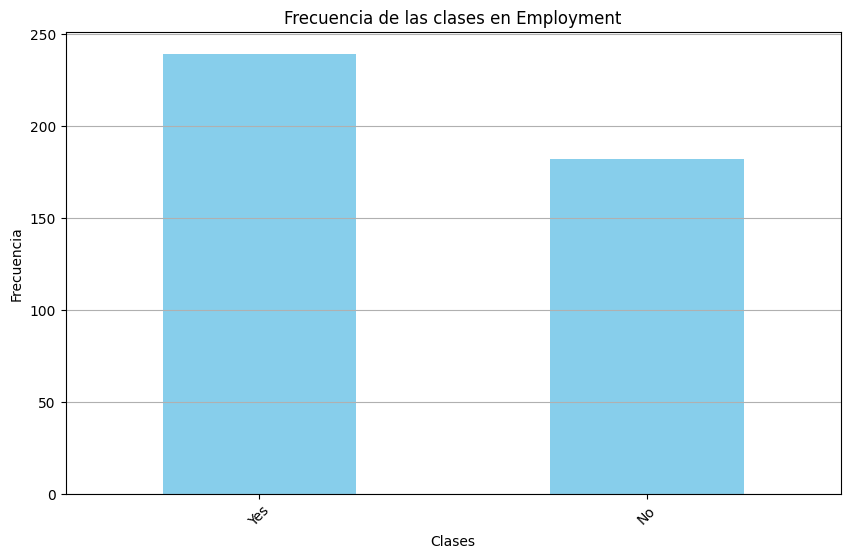

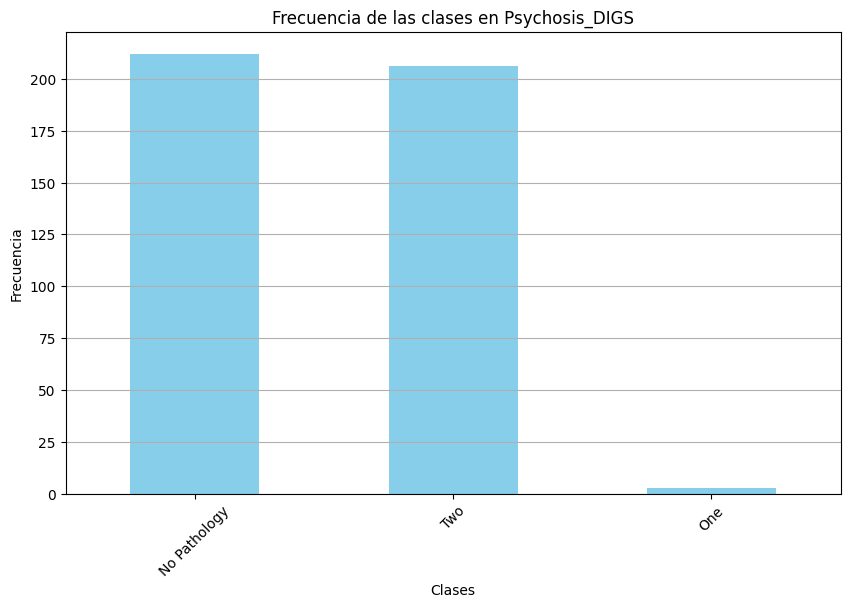

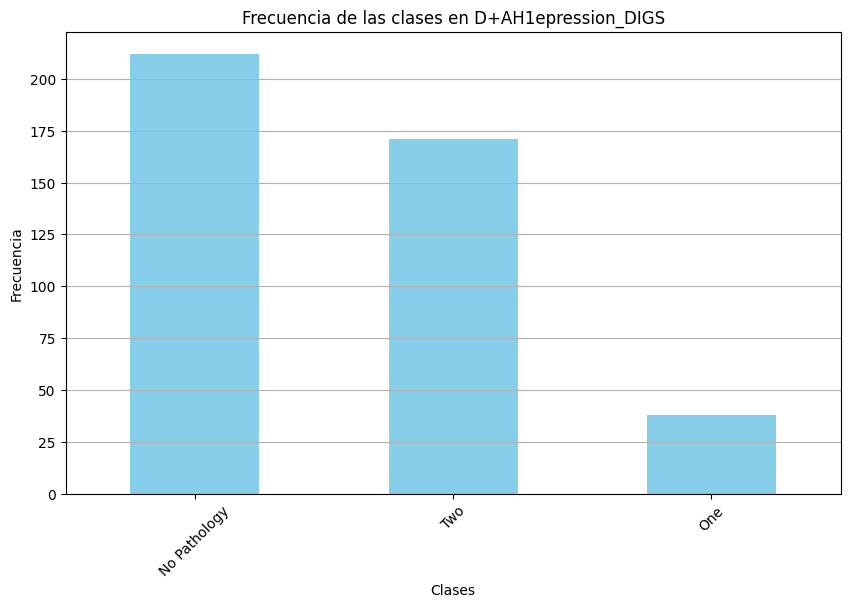

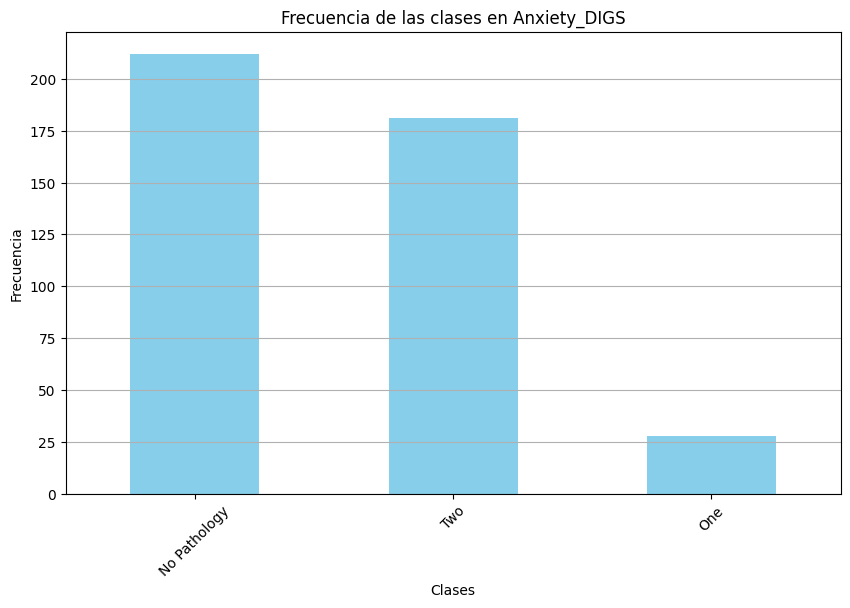

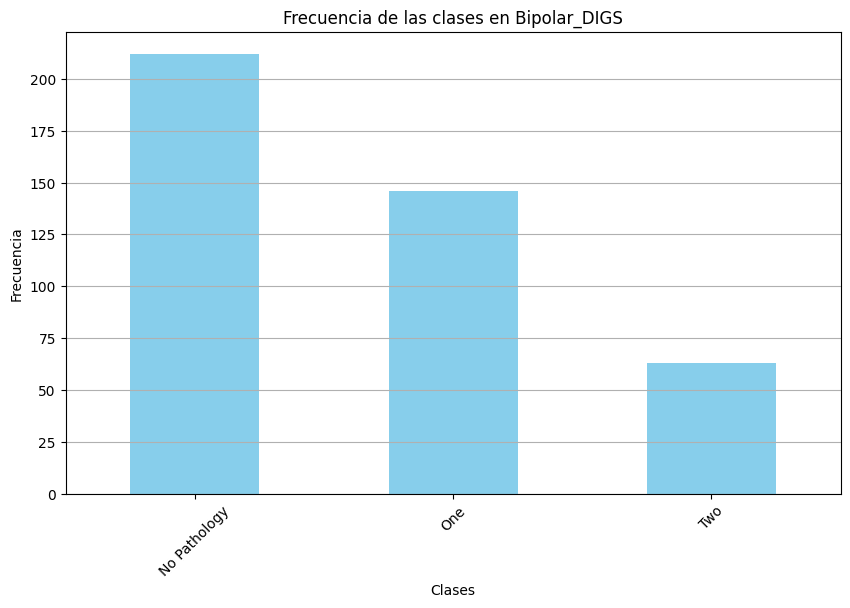

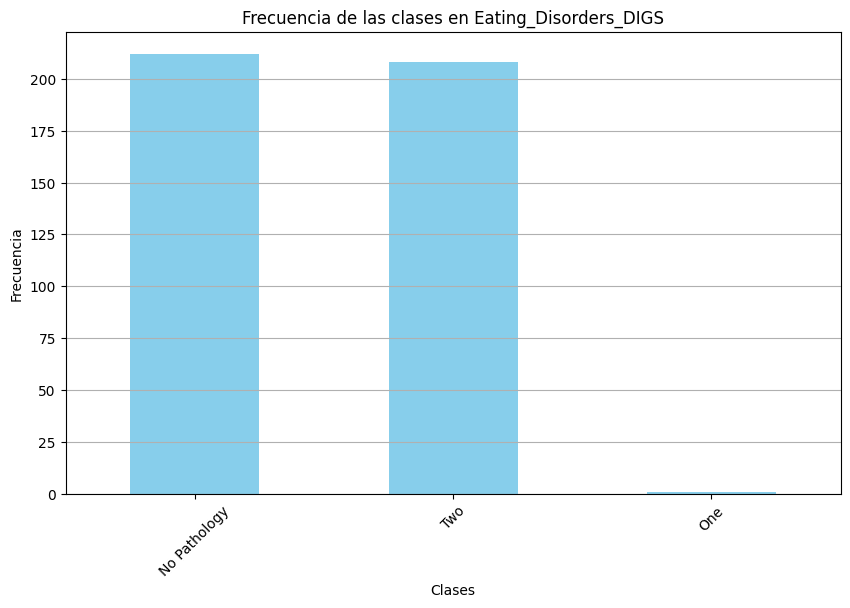

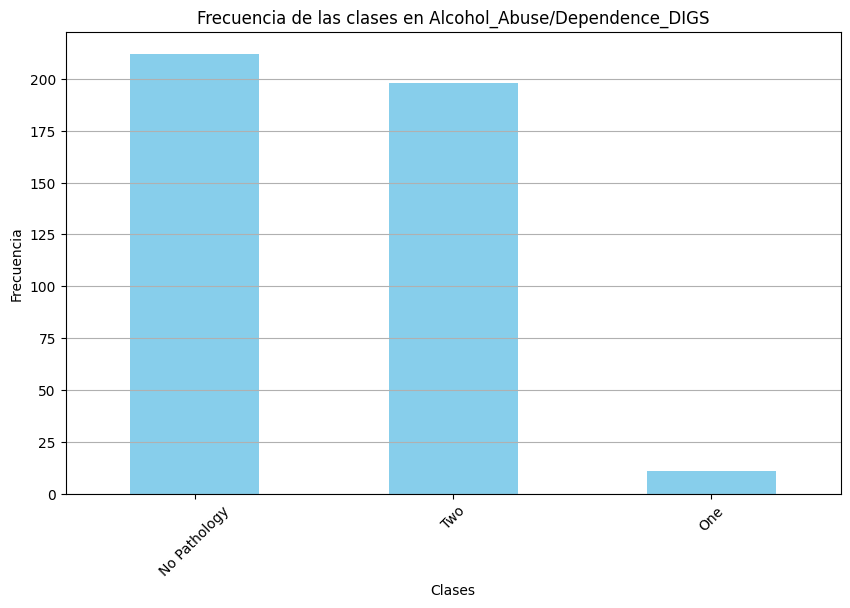

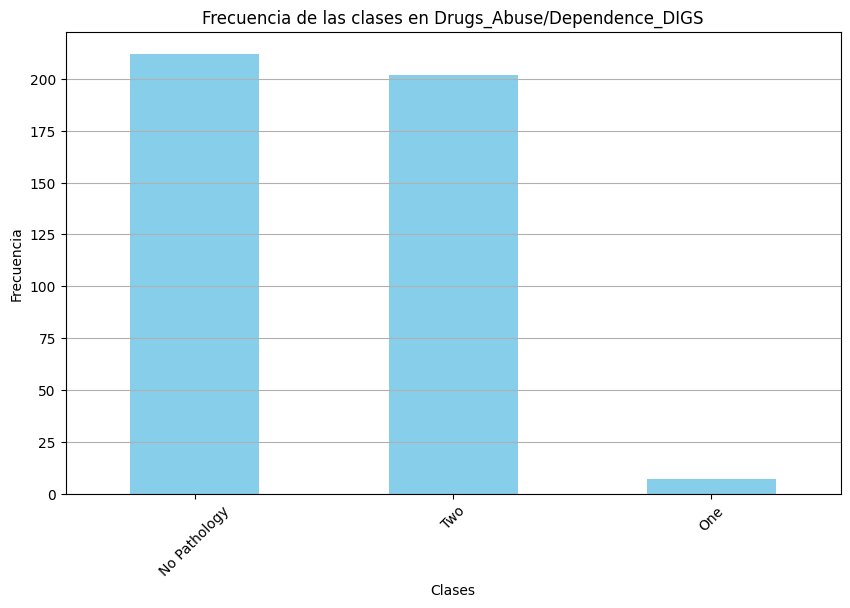

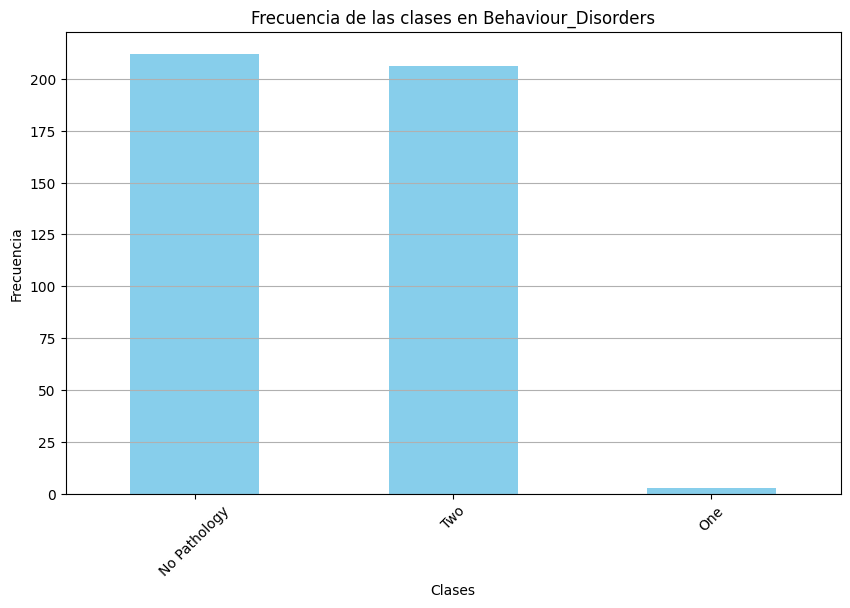

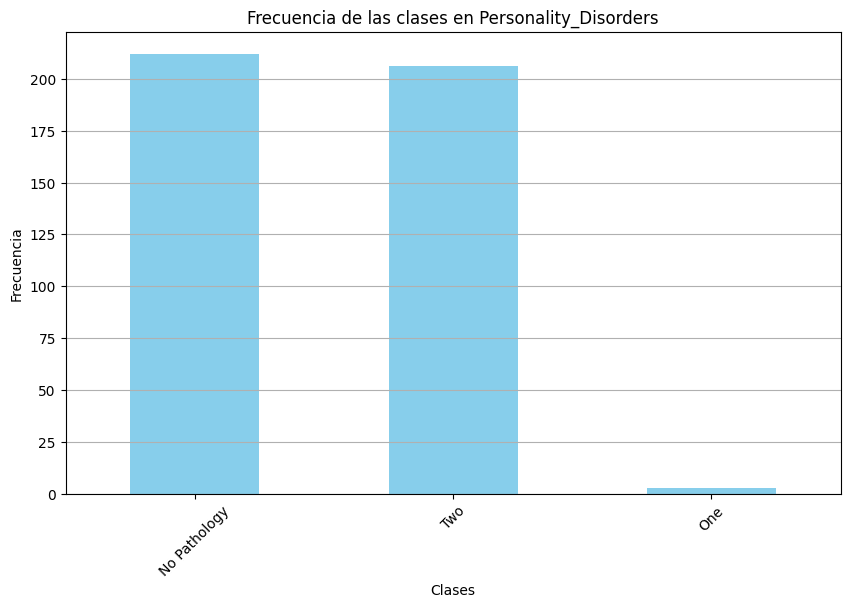

In [262]:
# Calculamos la frecuencia de cada una de las clases exepto la clase de salida
import matplotlib.pyplot as plt

# Obtener todas las columnas categóricas excepto 'Psychiatric_Diagnosis_DIGS'
columnas_categoricas = df_copia.select_dtypes(include='object').columns
columnas_graficas = [columna for columna in columnas_categoricas if columna != 'Psychiatric_Diagnosis_DIGS']

# Creamos subgráficos solo para las columnas seleccionadas
for columna in columnas_graficas:
    # Calculamos la frecuencia de las clases
    frecuencia_clases = df_copia[columna].value_counts()

    # Creamos el gráfico de barras
    plt.figure(figsize=(10, 6))
    frecuencia_clases.plot(kind='bar', color='skyblue')
    plt.title(f"Frecuencia de las clases en {columna}")
    plt.xlabel("Clases")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Mostramos el gráfico
    plt.show()


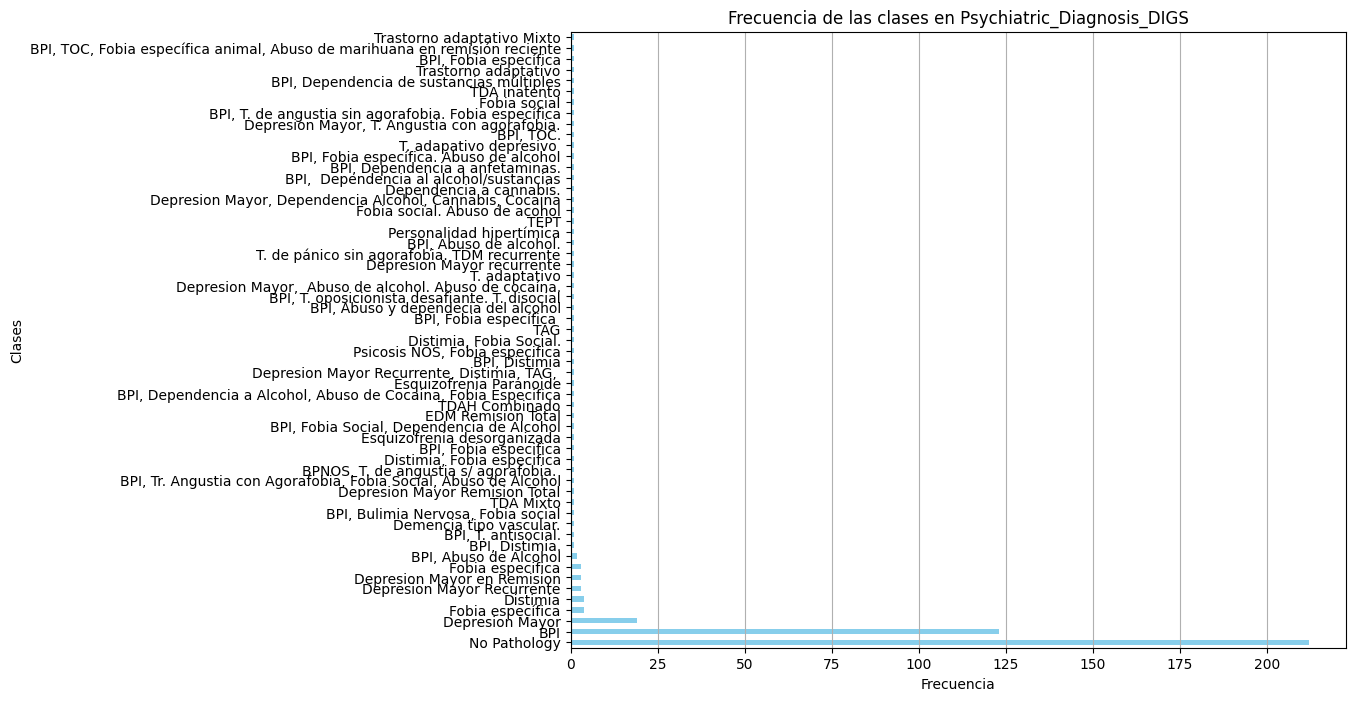

In [232]:
# Creamos un gráfico de barras horizontales para la salida ya que tiene muchas clases
plt.figure(figsize=(10, 8))
frecuencia_clases.plot(kind='barh', color='skyblue')
plt.title("Frecuencia de las clases en Psychiatric_Diagnosis_DIGS")
plt.xlabel("Frecuencia")
plt.ylabel("Clases")
plt.grid(axis='x')

# Mostrar el gráfico
plt.show()


In [265]:
# Hacemos un shape para ver como quedó el dataset
df_copia.shape

(421, 18)



---



# Análisis univariante
Se emplean técnicas de visualización (histogramas, boxplot, gráficos de barras) en función del tipo de datos y la escala de medición.

# Este criterio depende de una competencia de aprendizajeAnálisis bi/multivariante

Se efectúan análisis de correlación (cuantitativos y gráficos) para explorar las relaciones entre las variables importantes del conjunto de datos.

# Preprocesamiento
Se ejecutan y justifican las estrategias para el manejo de valores faltantes, atípicos y alta cardinalidad (si aplica)

# Conclusiones

Se incluyen las ideas/observaciones clave, asegurándose de responder todas las preguntas propuestas que apliquen al proyecto.